In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import operator
import numpy as np
from operator import add
import csv

## Generate Transition Probability Matrix M

### Parameters: k, zeros

In [4]:
def create_M(k, zeros):

    M_t = np.random.uniform(low = 0, high = 1.0, size = (k, k))
    
    # Randomly convert some elements to 0
    num_zeros = int(zeros * k * k)
    zero_indices = np.random.choice(k * k, num_zeros, replace = False)
    row_indices, col_indices = np.unravel_index(zero_indices, (k, k))
    M_t[row_indices, col_indices] = 0
    
    # Normalisation
    M_t /= M_t.sum(axis = 1, keepdims = True)

    return M_t

## Random Surfer Model
### Parameters: alpha, dist_nodes

In [6]:
def RandomWalk2(transition_probs, DG, alpha, num_iterations, dist_nodes):
    num_nodes = len(transition_probs)
    pagerank_values = np.ones(num_nodes) / num_nodes
    
    for iteration in range(num_iterations):
        new_pagerank_values = np.zeros(num_nodes)
        for j in range(num_nodes):
            # Follow transition matrix
            new_pagerank_j = alpha * sum(transition_probs[i][j] * pagerank_values[i] for i in range(num_nodes))
            # Random jumps
            new_pagerank_j += (1 - alpha) * (dist_nodes[j])
            new_pagerank_values[j] = new_pagerank_j
        
        # Convergence checking
        if (iteration > 1) and (np.linalg.norm(new_pagerank_values - pagerank_values) < 1e-10):
            print("Convergence on iteration ", iteration+1)
            break
        pagerank_values = new_pagerank_values
    
    # Normalisation
    pagerank_values /= sum(pagerank_values)
    sorted_pagerank = sorted(enumerate(pagerank_values), key = operator.itemgetter(1), reverse = True)
    
    return sorted_pagerank

## Graph with 4 Nodes

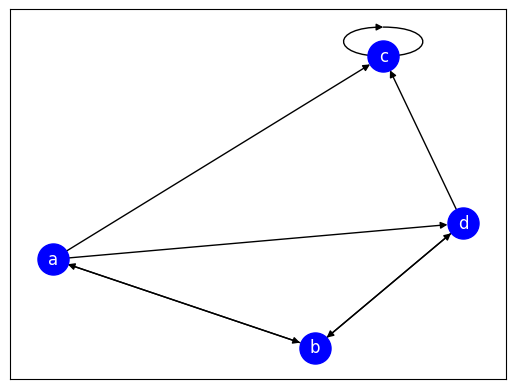

In [195]:
DG4 = nx.DiGraph()

adj_matrix = np.array([[0, 1/3, 1/3, 1/3],
                      [1/2, 0, 0, 1/2],
                      [0, 0, 1, 0],
                      [0, 1/2, 1/2, 0]])

for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix[i])):
        weight = adj_matrix[i][j]
        if weight > 0:
            DG4.add_edge(i, j, weight=weight)

mapping = {0: 'a', 1: 'b', 2: 'c', 3: 'd'}
pos = nx.spring_layout(DG4) 
nx.draw_networkx(DG4, pos = pos, arrows = True, arrowsize = 10, labels = mapping, with_labels = True, node_color = 'blue', node_size = 500, font_size = 12, font_color = 'white')
plt.show()

In [196]:
# Parameters Tested

alphas = [0.75, 0.8, 0.85, 0.9]
dist_node_list = [[1/4, 1/4, 1/4, 1/4], 
                  [1/4, 1/2, 1/4, 0], 
                  [1/2, 1/4, 0, 1/4], 
                  [1/4, 0, 1/4, 1/2], 
                  [0, 1/4, 1/2, 1/4]]

In [199]:
for alpha in alphas:
    for dist_nodes in dist_node_list:
        sorted_random_walk = RandomWalk2(adj_matrix, DG4, alpha, 100, dist_nodes)
        print("alpha = ", alpha, ", dist_nodes = ", dist_nodes)
        print("Sorted Random Walk: ", sorted_random_walk)
        print()

Convergence on iteration  37
alpha =  0.75 , dist_nodes =  [0.25, 0.25, 0.25, 0.25]
Sorted Random Walk:  [(2, 0.5882352939978892), (1, 0.1470588235739954), (3, 0.1470588235739954), (0, 0.11764705885412007)]

Convergence on iteration  36
alpha =  0.75 , dist_nodes =  [0.25, 0.5, 0.25, 0]
Sorted Random Walk:  [(2, 0.5521390372484196), (1, 0.20053475942706242), (0, 0.13770053480654657), (3, 0.10962566851797138)]

Convergence on iteration  36
alpha =  0.75 , dist_nodes =  [0.5, 0.25, 0, 0.25]
Sorted Random Walk:  [(2, 0.4558823528065572), (0, 0.19117647062262205), (1, 0.17647058828541035), (3, 0.17647058828541035)]

Convergence on iteration  37
alpha =  0.75 , dist_nodes =  [0.25, 0, 0.25, 0.5]
Sorted Random Walk:  [(2, 0.6243315506635875), (3, 0.1844919786612058), (0, 0.09759358292309174), (1, 0.09358288775211496)]

Convergence on iteration  37
alpha =  0.75 , dist_nodes =  [0, 0.25, 0.5, 0.25]
Sorted Random Walk:  [(2, 0.7205882351281758), (1, 0.11764705888530645), (3, 0.1176470588853064

In [200]:
# Convergence to Closed Form

alpha = 0.75
dist_nodes = np.array([0.25, 0.5, 0.25, 0])
adj_matrix = np.array([[0, 1/3, 1/3, 1/3],
                      [1/2, 0, 0, 1/2],
                      [0, 0, 1, 0],
                      [0, 1/2, 1/2, 0]])
num_nodes = len(adj_matrix)


closed_form = np.linalg.inv(np.identity(num_nodes) - alpha * adj_matrix.T) @ ((1 - alpha) * dist_nodes)
print(closed_form)

[0.13770053 0.20053476 0.55213904 0.10962567]


## Graph with 10 Nodes

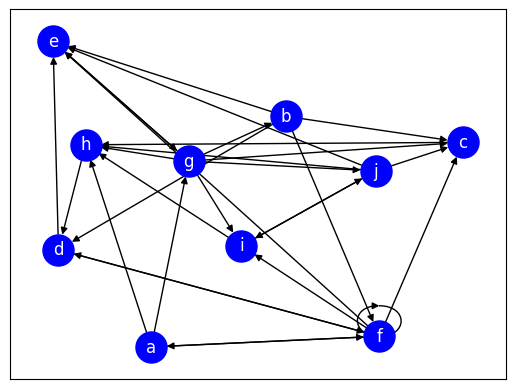

In [210]:
DG10 = nx.DiGraph()

adj_matrix = create_M(10, 0.7)

for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix[i])):
        weight = adj_matrix[i][j]
        if weight > 0:
            DG10.add_edge(i, j, weight=weight)

# Map numbers to letters
mapping = {i: chr(97 + i) for i in range(10)}
pos = nx.spring_layout(DG10)
nx.draw_networkx(DG10, pos = pos, arrows = True, arrowsize = 10, labels = mapping, with_labels = True, node_color = 'blue', node_size = 500, font_size = 12, font_color = 'white')
plt.show()

In [211]:
# Parameters Tested

alphas = [0.75, 0.8, 0.85, 0.9]
dist_node_list = [[1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10], 
                  [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/16, 1/16, 1/16, 1/16], 
                  [1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/8, 1/8, 1/8, 1/8], 
                  [0, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9], 
                  [1/7, 1/7, 1/7, 1/7, 0, 0, 0, 1/7, 1/7, 1/7]]

In [214]:
for alpha in alphas:
    for dist_nodes in dist_node_list:
        sorted_random_walk = RandomWalk2(adj_matrix, DG10, alpha, 100, dist_nodes)
        print("alpha = ", alpha, ", dist_nodes = ", dist_nodes)
        print("Sorted Random Walk: ", sorted_random_walk)
        print()

Convergence on iteration  35
alpha =  0.75 , dist_nodes =  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Sorted Random Walk:  [(3, 0.15757975337807575), (7, 0.15300683130592826), (5, 0.13908756396633853), (6, 0.12814060726693727), (4, 0.1276146908432777), (8, 0.08024305194992402), (2, 0.06333195213428502), (9, 0.05459030487375825), (1, 0.053258875490587755), (0, 0.0431463687908874)]

Convergence on iteration  35
alpha =  0.75 , dist_nodes =  [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.0625, 0.0625, 0.0625, 0.0625]
Sorted Random Walk:  [(3, 0.1566147727363603), (5, 0.15062129021456647), (7, 0.14119385020426484), (4, 0.1326498981638266), (6, 0.12387734597211594), (8, 0.07100706822502133), (2, 0.0708661668673621), (1, 0.05856869756512011), (0, 0.05090114207200572), (9, 0.04369976797935671)]

Convergence on iteration  34
alpha =  0.75 , dist_nodes =  [0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.125, 0

In [215]:
# Convergence to Closed Form

alpha = 0.75
num_nodes = len(adj_matrix)
dist_nodes = np.array([1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/8, 1/8, 1/8, 1/8])

closed_form = np.linalg.inv(np.identity(num_nodes) - alpha * adj_matrix.T) @ ((1 - alpha) * dist_nodes)
print(closed_form)

[0.03797652 0.04971899 0.05830914 0.15822307 0.12425789 0.13139841
 0.13098278 0.16088215 0.08640037 0.06185066]


## Graph with 50 Nodes

In [216]:
# Parameters Tested

alphas = [0.75, 0.8, 0.85, 0.9]
zero_list = [0.7, 0.75, 0.8, 0.85, 0.9]
dist_nodes = np.full(50, 1/50)

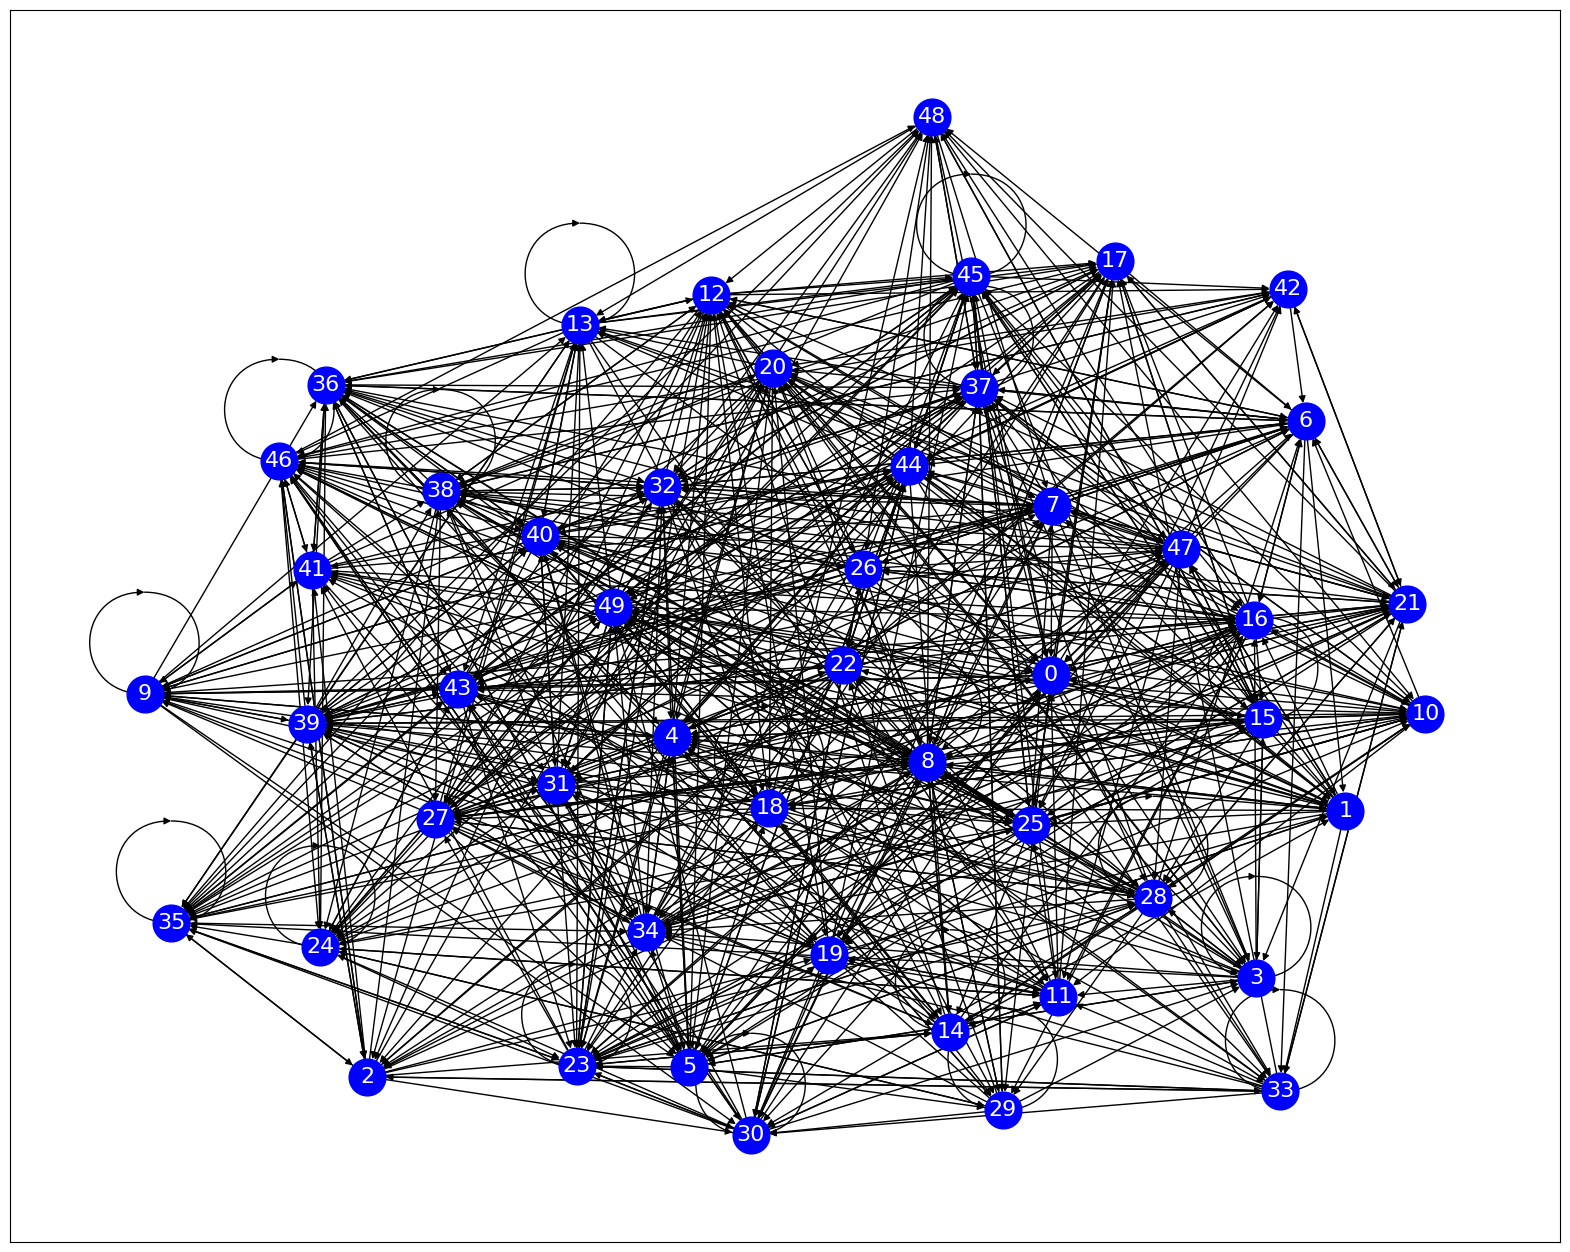

Convergence on iteration  13
alpha =  0.75 , zeros =  0.7
Sorted Random Walk:  [(23, 0.03032164470465644), (43, 0.029741896018090446), (24, 0.02701308926726134), (34, 0.026660038430727277), (32, 0.025755845693211942), (35, 0.024691225877775516), (17, 0.02447550202500856), (0, 0.02425972669601192), (36, 0.02398423914573994), (21, 0.02350406589267975), (5, 0.023429871065024945), (8, 0.02336501255673733), (49, 0.023225264768538933), (4, 0.023163702775830155), (39, 0.02310531773778096), (37, 0.02275638273645812), (6, 0.022745381673225422), (25, 0.02232413949995236), (28, 0.022065153945798468), (1, 0.021451102098033036), (12, 0.02127165459155875), (3, 0.021266750667939722), (16, 0.021196842703603617), (30, 0.020972420073504097), (11, 0.020827877893327233), (20, 0.01999096267707103), (38, 0.019899126315976064), (45, 0.019597908750202002), (46, 0.019546166234948176), (15, 0.0190275900064694), (27, 0.018338471292550534), (9, 0.018240187855489712), (44, 0.018168938230806692), (31, 0.01815503146

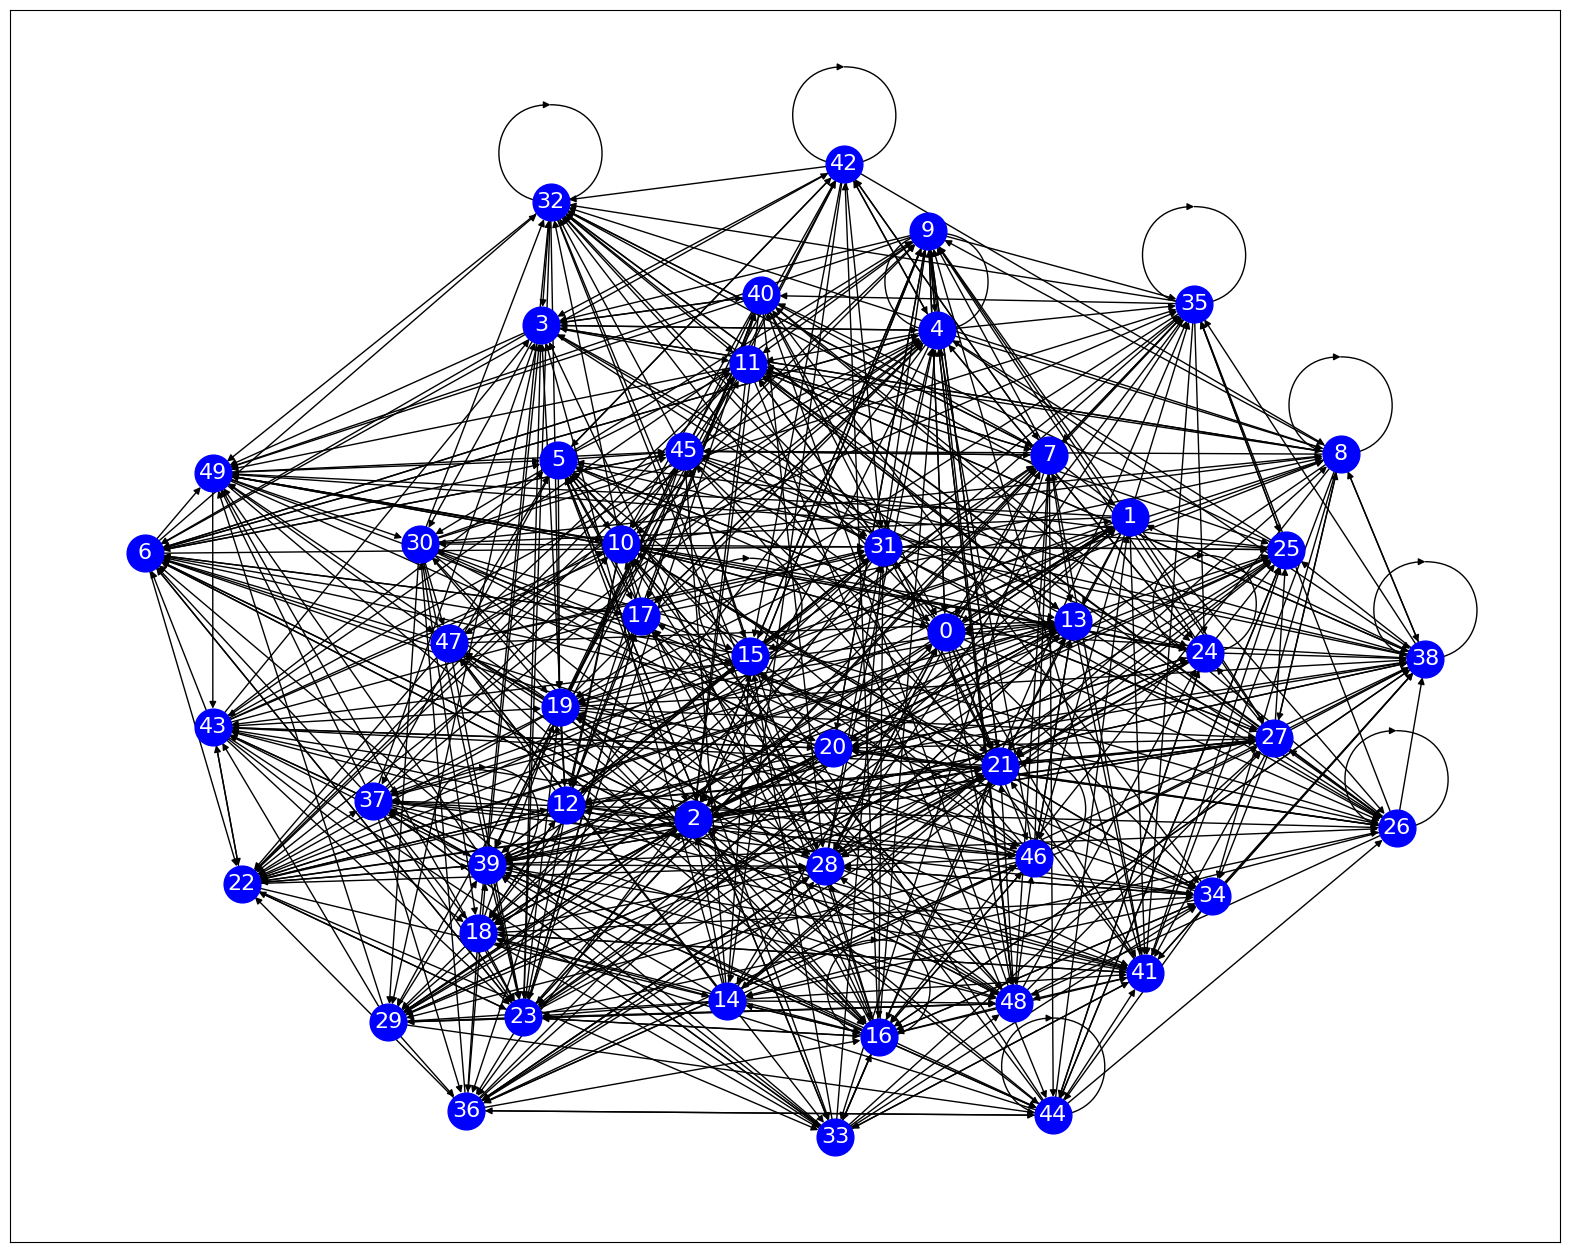

Convergence on iteration  14
alpha =  0.75 , zeros =  0.75
Sorted Random Walk:  [(32, 0.031010705409433372), (16, 0.029619235587297597), (23, 0.029215353672949713), (7, 0.028656062510121778), (21, 0.027373146699451723), (38, 0.027255717502489032), (2, 0.027142192312760546), (28, 0.026623305527883605), (6, 0.024601366251059773), (4, 0.02382681542852219), (10, 0.023112850778375663), (41, 0.02297386858483921), (25, 0.02225024309939941), (13, 0.02153964660089215), (18, 0.0214834110196617), (11, 0.021443357023897904), (3, 0.021169408246355128), (49, 0.021124318601155552), (34, 0.0210512378061832), (9, 0.020886774127714804), (22, 0.02044693390746352), (43, 0.02027543419709499), (39, 0.019807324647230576), (24, 0.019579944215163233), (26, 0.019468862460520958), (12, 0.019183776679245), (27, 0.019094738204481574), (31, 0.018943744645778447), (35, 0.018166394415429932), (15, 0.018015019616275746), (40, 0.017838668388175497), (48, 0.01770787987115432), (19, 0.017660577047049972), (44, 0.01763799

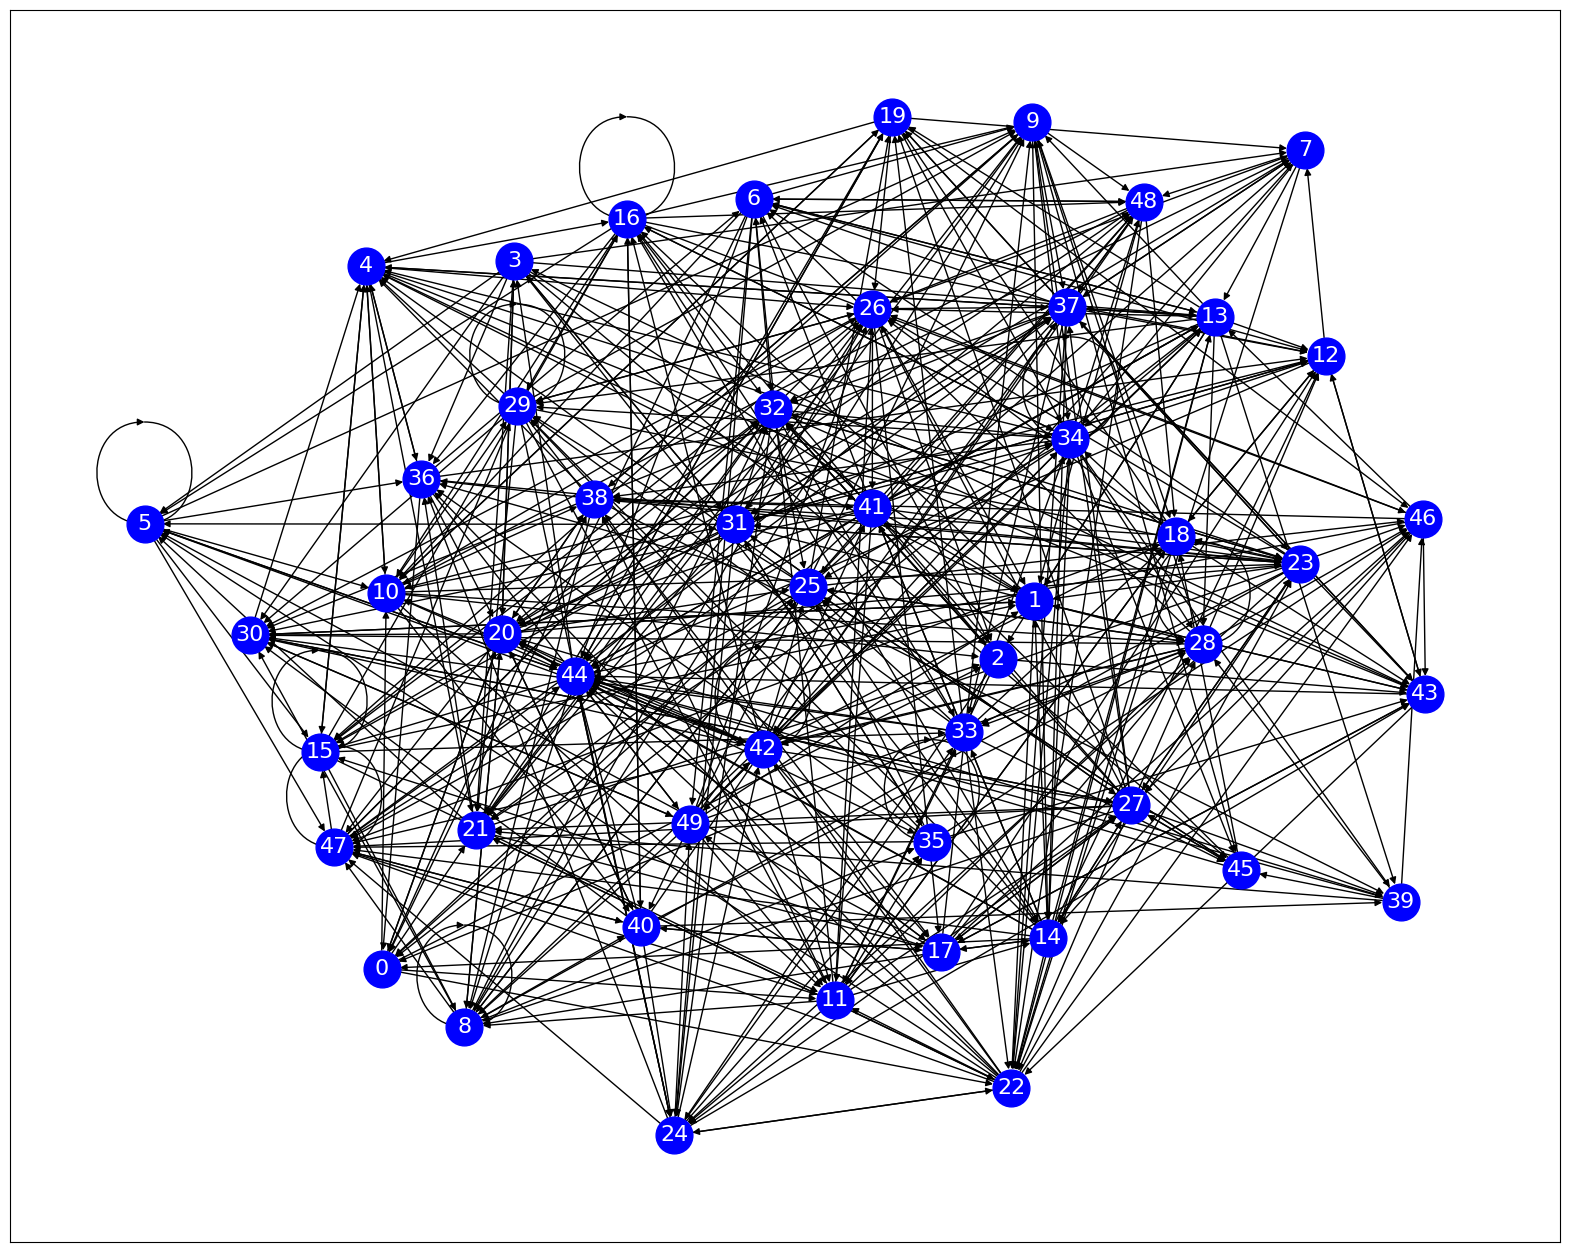

Convergence on iteration  17
alpha =  0.75 , zeros =  0.8
Sorted Random Walk:  [(44, 0.0457493702987935), (43, 0.030974889282096473), (4, 0.030203733528916143), (8, 0.028457117993982862), (34, 0.027659045446229765), (17, 0.027594304515562846), (37, 0.027009262881991885), (22, 0.02676480626061248), (47, 0.025061915918378398), (36, 0.025019953765064936), (26, 0.024009118535843), (28, 0.02335054707594425), (30, 0.0229830470506337), (24, 0.02267389002664902), (9, 0.022564013389172268), (48, 0.022544104076446168), (23, 0.022436212755995985), (21, 0.022297208075413067), (32, 0.021947095489068126), (12, 0.021494227969742485), (27, 0.021220792672171772), (25, 0.020992526137666962), (7, 0.02022216786363584), (1, 0.019968769816972307), (33, 0.01949437348352981), (2, 0.019061696001952476), (5, 0.01867183628079178), (18, 0.018058045504150903), (42, 0.017579223906884524), (46, 0.017526550664155028), (49, 0.017372304369478453), (15, 0.016951809623909804), (19, 0.016537962946765464), (13, 0.016508294

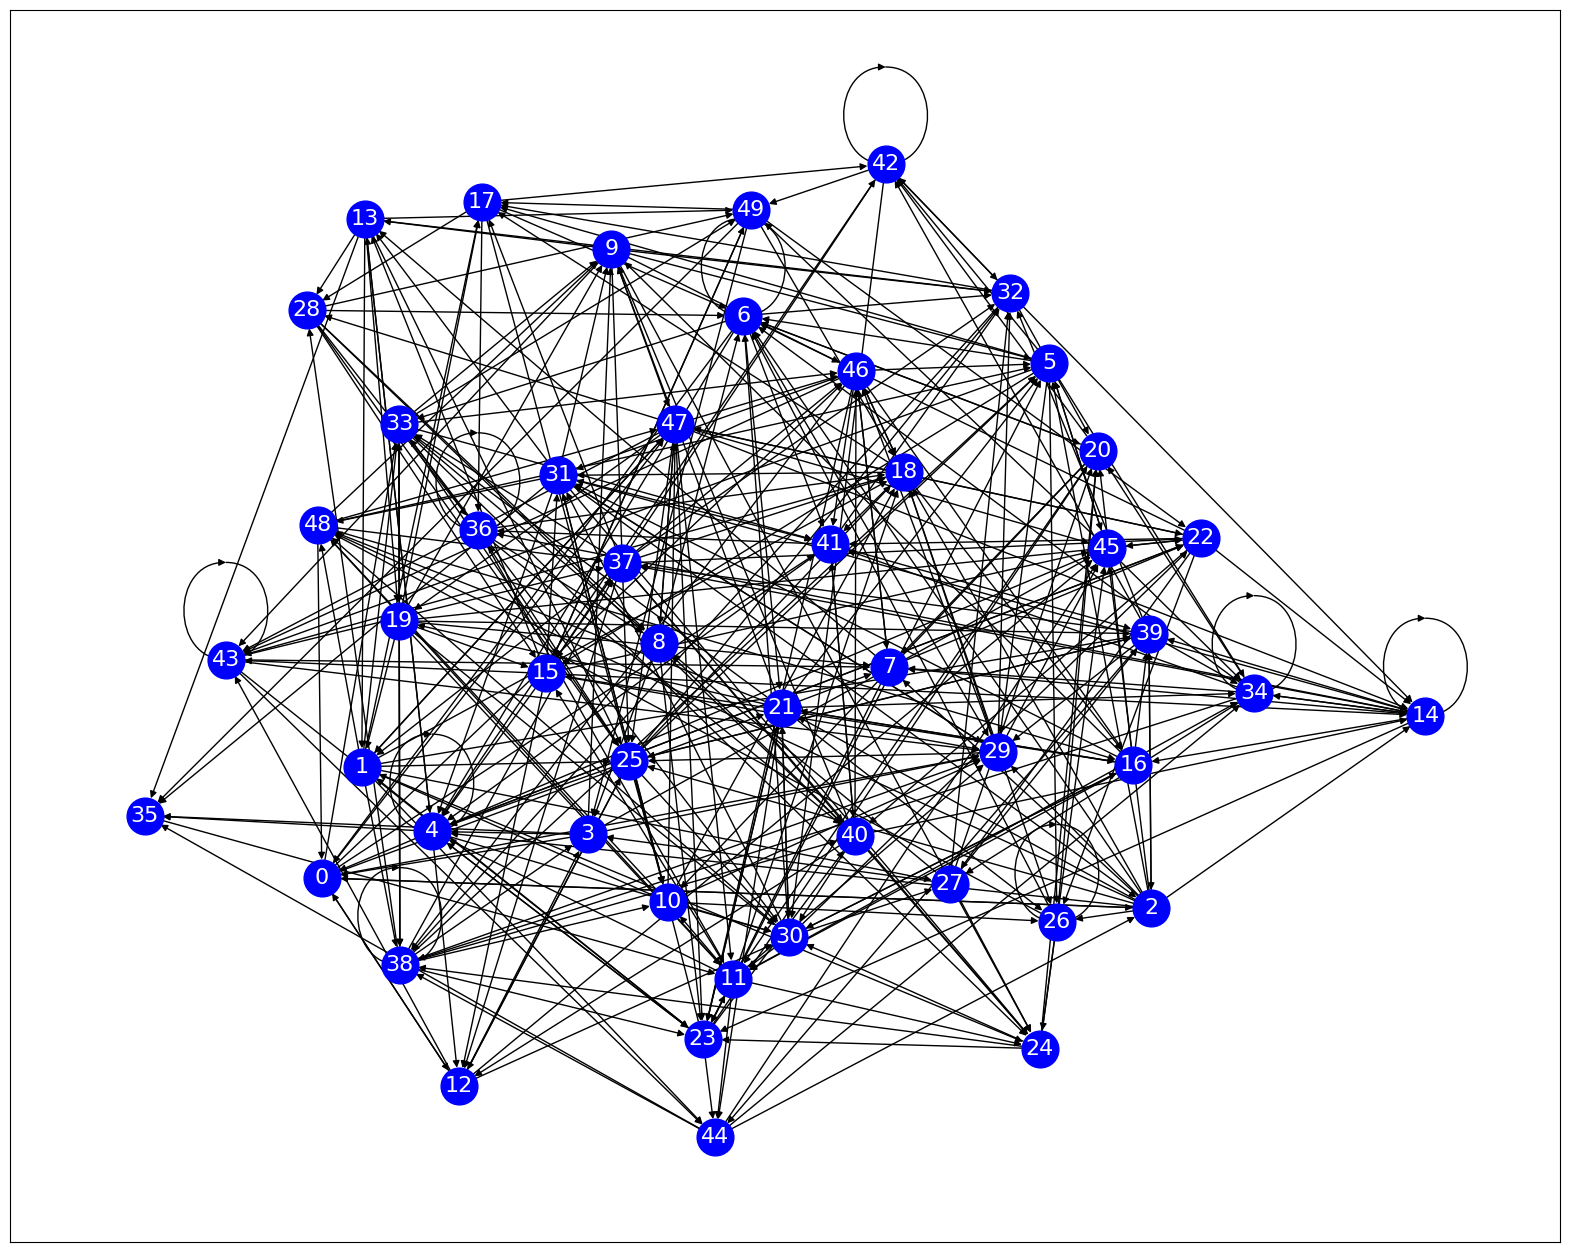

Convergence on iteration  18
alpha =  0.75 , zeros =  0.85
Sorted Random Walk:  [(6, 0.03899382000253003), (45, 0.034147069423418004), (11, 0.031710610287351615), (29, 0.03155181465464565), (34, 0.03096533439377697), (32, 0.02746371357344049), (42, 0.027023875200928832), (30, 0.026658243727476532), (18, 0.02574262763548846), (23, 0.024646842251828643), (46, 0.02446862359943877), (10, 0.02380853711299684), (25, 0.023794048195900155), (20, 0.02378573536991512), (4, 0.023345878150496192), (14, 0.022972194510102767), (41, 0.022402567662812605), (38, 0.02186954947490851), (40, 0.021197013780575362), (26, 0.021093132057754142), (5, 0.02090448962927407), (7, 0.020829772384485946), (31, 0.020551666489615057), (12, 0.020209447766231303), (39, 0.020101612905690673), (24, 0.02004653595253491), (49, 0.019193406387191837), (17, 0.01871433576301903), (37, 0.01832892098690762), (3, 0.018159090769731573), (43, 0.017979460523693598), (15, 0.017419280804086862), (36, 0.01706366269340891), (33, 0.0163663

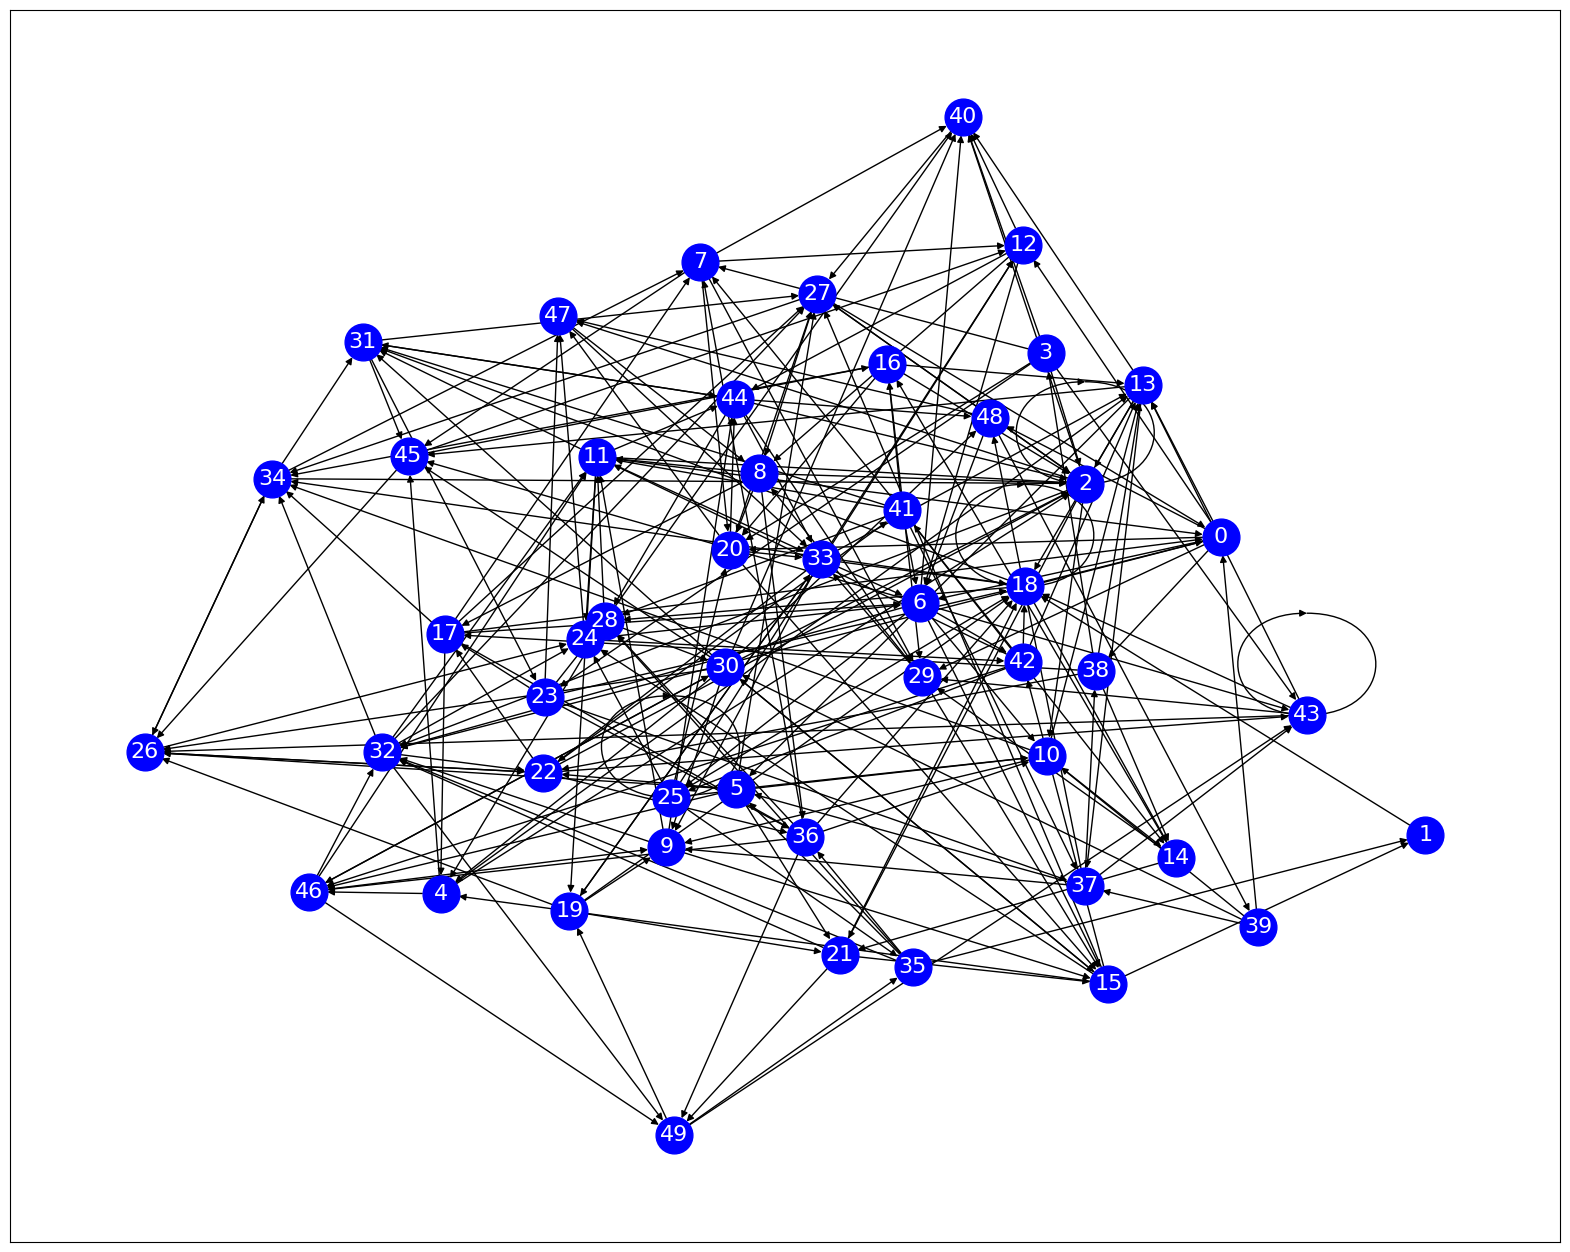

Convergence on iteration  24
alpha =  0.75 , zeros =  0.9
Sorted Random Walk:  [(2, 0.04987241691286958), (18, 0.0492098096082402), (27, 0.045212496302862795), (8, 0.044469882758630674), (11, 0.03876305330982631), (34, 0.03594766964130605), (26, 0.031524928164822), (40, 0.02900062361986185), (20, 0.02817213961213627), (32, 0.027256218975354393), (6, 0.0265246196031269), (31, 0.025862656992372092), (28, 0.024914329423338037), (44, 0.02158838024055437), (24, 0.021293910774296595), (15, 0.02063085043476076), (45, 0.02008401220439139), (29, 0.019845768722705128), (0, 0.01971700201086981), (14, 0.0197030798927201), (47, 0.019540700570313714), (19, 0.019159519373581475), (21, 0.019083021212839817), (33, 0.01901211596522137), (22, 0.017711572781708252), (46, 0.017127325639675364), (49, 0.016964702928048348), (9, 0.01671641316827035), (42, 0.01666245616896406), (12, 0.016397039628324166), (7, 0.016268502982203115), (4, 0.015185680514016501), (10, 0.014933043992314777), (25, 0.01384015775092332

In [219]:
for zeros in zero_list:
        DG50 = nx.DiGraph()

        adj_matrix = create_M(50, zeros)

        for i in range(len(adj_matrix)):
            for j in range(len(adj_matrix[i])):
                weight = adj_matrix[i][j]
                if weight > 0:
                    DG50.add_edge(i, j, weight=weight)

        pos = nx.spring_layout(DG50)
        plt.figure(figsize=(20, 16))
        nx.draw_networkx(DG50, pos = pos, arrows = True, arrowsize = 10, with_labels = True, node_color = 'blue', node_size = 700, font_size = 16, font_color = 'white')
        plt.show()
        
        for alpha in alphas:
            sorted_random_walk = RandomWalk2(adj_matrix, DG50, alpha, 100, dist_nodes)
            print("alpha = ", alpha, ", zeros = ", zeros)
            print("Sorted Random Walk: ", sorted_random_walk)
            print()

In [220]:
# Convergence to Closed Form

alpha = 0.75
num_nodes = len(adj_matrix)

closed_form = np.linalg.inv(np.identity(num_nodes) - alpha * adj_matrix.T) @ ((1 - alpha) * dist_nodes)
print(closed_form)

[0.019717   0.01266149 0.04987242 0.0064205  0.01518568 0.00774271
 0.02652462 0.0162685  0.04446988 0.01671641 0.01493304 0.03876305
 0.01639704 0.01261211 0.01970308 0.02063085 0.01229291 0.01218762
 0.04920981 0.01915952 0.02817214 0.01908302 0.01771157 0.01018633
 0.02129391 0.01384016 0.03152493 0.0452125  0.02491433 0.01984577
 0.01117098 0.02586266 0.02725622 0.01901212 0.03594767 0.0072895
 0.01329092 0.00762151 0.00922635 0.0054934  0.02900062 0.01297825
 0.01666246 0.01087463 0.02158838 0.02008401 0.01712733 0.0195407
 0.0097547  0.0169647 ]


## Map Reduce

In [65]:
adj_matrix = create_M(50, 0.9)

with open('adj_matrix.csv', 'w', newline = '') as csvfile:
    writer = csv.writer(csvfile)
    for column in adj_matrix:
        writer.writerow(column)

In [58]:
adj_matrix = sc.textFile("adj_matrix.csv").map(lambda line: [float(x) for x in line.split(',')])

adj_matrix_t = adj_matrix.zipWithIndex() \
    .flatMap(lambda row: [(j, (row[1], row[0][j])) for j in range(num_nodes)]) \
    .groupByKey() \
    .sortByKey() \
    .mapValues(lambda values: sorted(values, key=lambda x: x[0])) \
    .map(lambda x: [v[1] for v in x[1]])

pagerank = dict([(i, 1.0) for i in range(num_nodes)])

for n in range(num_iterations):
    new_pagerank = adj_matrix_t \
        .map(lambda col: sum(alpha * col[i] * pagerank[i] for i in range(num_nodes)) + (1 - alpha) / num_nodes) \
        .collect()
    
    for i, score in enumerate(new_pagerank):
        pagerank[i] = score

sorted_pagerank = sorted(pagerank.items(), key = lambda x: x[1], reverse = True)
for node, score in sorted_pagerank:
    print("Node:", node, "Score:", score)

Node: 14 Score: 0.04925427414845215
Node: 47 Score: 0.03712910347911889
Node: 10 Score: 0.033813682077027424
Node: 44 Score: 0.03335426707216405
Node: 15 Score: 0.030632084052037607
Node: 38 Score: 0.030368682248545668
Node: 34 Score: 0.030366808307172432
Node: 33 Score: 0.030328643883154958
Node: 41 Score: 0.029895453858532768
Node: 36 Score: 0.029115383844539315
Node: 8 Score: 0.026654354567193218
Node: 23 Score: 0.026627974198320564
Node: 32 Score: 0.026456383302507432
Node: 40 Score: 0.025638487580745155
Node: 18 Score: 0.02542368663775208
Node: 20 Score: 0.024797452961044762
Node: 39 Score: 0.024430961229358523
Node: 31 Score: 0.022604059962682957
Node: 30 Score: 0.022358441085202366
Node: 16 Score: 0.021461569110228992
Node: 1 Score: 0.020689759236369985
Node: 45 Score: 0.020531884652043853
Node: 13 Score: 0.018534833654379836
Node: 2 Score: 0.017463233110635412
Node: 19 Score: 0.016790942584305215
Node: 6 Score: 0.016656502848158665
Node: 48 Score: 0.016621364736128134
Node: 42 